In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
df = pd.read_csv("/content/drive/MyDrive/Projects/DiabetTashxis/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [100]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

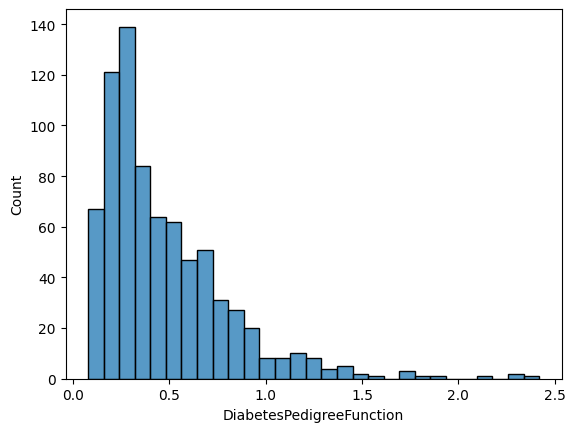

In [101]:
sns.histplot(data=df['DiabetesPedigreeFunction'])

In [102]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [103]:
X = df.drop(['Outcome', 'SkinThickness', 'BloodPressure'], axis=1)
Y = df[['Outcome']]

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379, -0.69289057,  0.20401277,  0.46849198,
         1.4259954 ],
       [-0.84488505, -1.12339636, -0.69289057, -0.68442195, -0.36506078,
        -0.19067191],
       [ 1.23388019,  1.94372388, -0.69289057, -1.10325546,  0.60439732,
        -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.27959377, -0.73518964, -0.68519336,
        -0.27575966],
       [-0.84488505,  0.1597866 , -0.69289057, -0.24020459, -0.37110101,
         1.17073215],
       [-0.84488505, -0.8730192 , -0.69289057, -0.20212881, -0.47378505,
        -0.87137393]])

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=47)

In [106]:
x_train

array([[ 6.39947260e-01, -1.27988209e+00, -6.92890572e-01,
        -7.35189644e-01, -4.79825287e-01,  6.60205626e-01],
       [ 4.60143347e-02, -8.10424908e-01, -6.92890572e-01,
         9.41978774e-04, -9.38883326e-01, -1.90671905e-01],
       [-8.44885053e-01, -3.72264873e-01,  4.79300377e-01,
        -8.62108890e-01,  1.09063642e+00, -8.71373930e-01],
       ...,
       [ 4.60143347e-02,  6.58951615e-02, -6.92890572e-01,
         9.41978774e-04, -7.42575612e-01,  1.49679107e-01],
       [ 1.82781311e+00,  1.81853530e+00, -6.92890572e-01,
         3.94391639e-01, -8.21098698e-01,  3.19854614e-01],
       [-5.47918591e-01,  1.28489452e-01,  5.22714857e-01,
         2.29396620e-01, -1.15935199e+00, -1.90671905e-01]])

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [108]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [109]:
y_predict = knn.predict(x_test)

In [110]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.48484848484848486

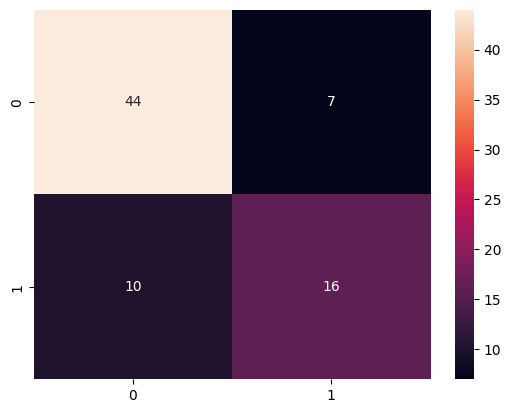

In [111]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84        51
           1       0.70      0.62      0.65        26

    accuracy                           0.78        77
   macro avg       0.76      0.74      0.75        77
weighted avg       0.77      0.78      0.78        77



In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.6956521739130435
recall=0.6153846153846154
f1=0.6530612244897959
accuracy=0.7792207792207793


In [114]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = Y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(Y, predict))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       500
           1       0.62      0.60      0.61       268

    accuracy                           0.73       768
   macro avg       0.71      0.70      0.70       768
weighted avg       0.73      0.73      0.73       768



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

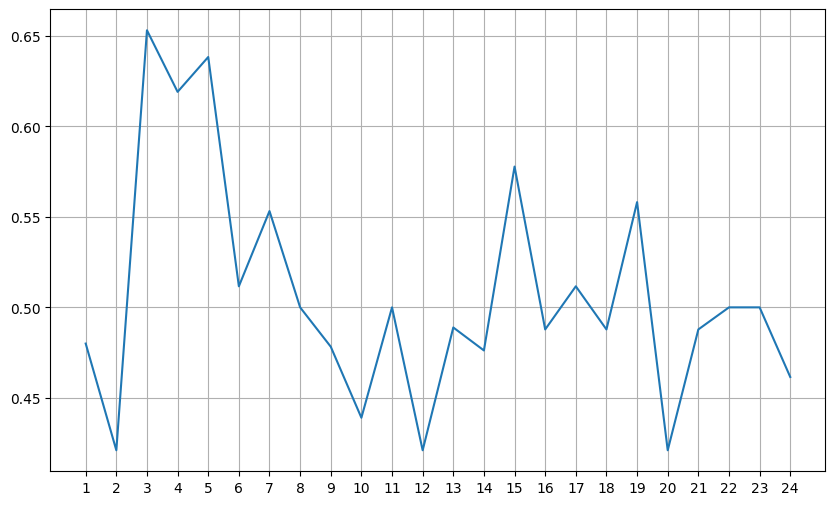

In [115]:
f1 = []
for k in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn2.fit(x_train, y_train)
    y_predict = knn2.predict(x_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()